In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.Карта для беспилотника

### Укажите акакой именно параметр распределения высот точек нужно оценивать для получения карты высот

Будем оценивать матожидание μ

### Имея выборку высот Z1, …, Zn предложите оценку высоты дорожного полотна hˆ(Zn) так, чтобы шум минимально влиял на итоговый результат.


Оценивать будем $\hat{h} = медиана$ . Так как по условию задачи сказано, что колчество шума сверху и снизу ступеньки одинаковое, то логично предположить, что искомая величина лежит ровно в середине выборки

### Объясните, почему предложенная вами оценка хороша в данном случае, предположите её свойства


Должна быть хорошей оценкокй, т.е она несмещенная, состоятельная и ассимптотически нормальная

### Дополнительный пункт. Проверьте статистическим моделированием выполнение предположенных свойств оценки.
Сгенерируйте выборку размера N (например, 10000) из распределения на ваш выбор. Представьте, что вся
сгенерированная выборка попала в одну клетку.
Напомню, что состоятельность или асимптотическую нормальность можно проверить, вычислив значение оценки для всех
размеров выборки от 1 до N. Несмещённость можно проверить бутстрапным методом (M выборок).


#### Состоятельность

медиана : 2.983754674538577


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


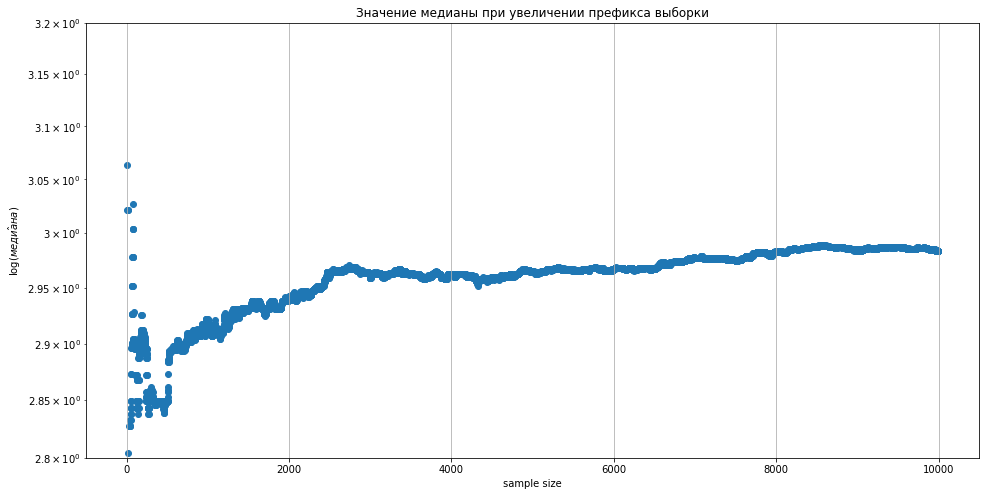

In [356]:
N=10000
mu=3

sample = sts.norm(loc=mu).rvs(N)

print(f'медиана : {np.median(sample)}')

median = np.array([np.median(sample[:i]) for i in range(N)])
n = np.arange(N)

fig, ax = plt.subplots(figsize=(16, 8))
ax.set_ylim(2.8, 3.2)
ax.set_ylabel(r'$\log(\hat{медиана})$')
ax.set_xlabel('sample size')
ax.grid()
ax.set_yscale('log')
ax.set_title('Значение медианы при увеличении префикса выборки')
ax.scatter(n, median)

По графику видно, что при $n->{\infty}$ оценка медианы стремится к значению самой медианы. Значит оценка медианы состоятельна

#### Ассимптотическая нормальность

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


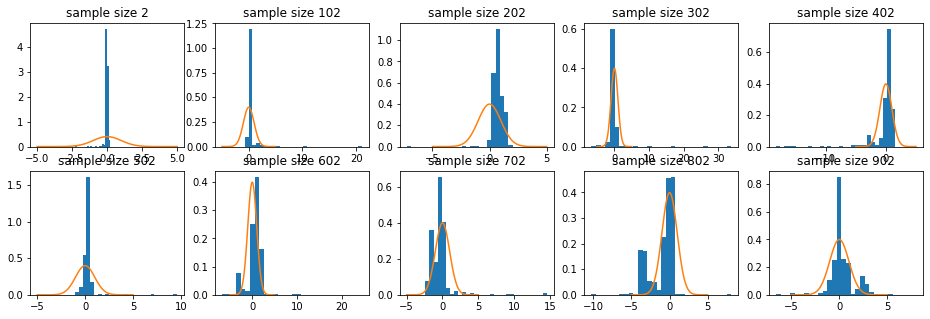

In [317]:
N=1000
M=1000
mu=0

sample = sts.norm(loc=mu).rvs((M,N))
me = np.median(sample, axis = 1)

median = np.array([np.median(sample[:,:i],axis = 1) for i in range(N)])
n = np.vstack([np.arange(N)+1] * M)
as_norm_stat = np.sqrt(n) * (median - me)

sizes = range(2, N+1, 100)  
fig, axs = plt.subplots(2, 5, figsize=(16, 5))
for size, ax in zip(sizes, axs.flatten()):
    ax.hist(as_norm_stat[:, size], density=True, bins=30)
    
    x = np.linspace(-5, 5, 100)
    ax.plot(x, sts.norm(loc=mu).pdf(x))
    ax.set_title(f'sample size {size}')

Вроде как похоже, что при увелении префикса гистограмма становится похожей на нормальное распределение. Но странно, что она не такая идеальная как на лекции, когда мы  оценивали матожидание выборочным средним

#### 3.Несмещенность

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


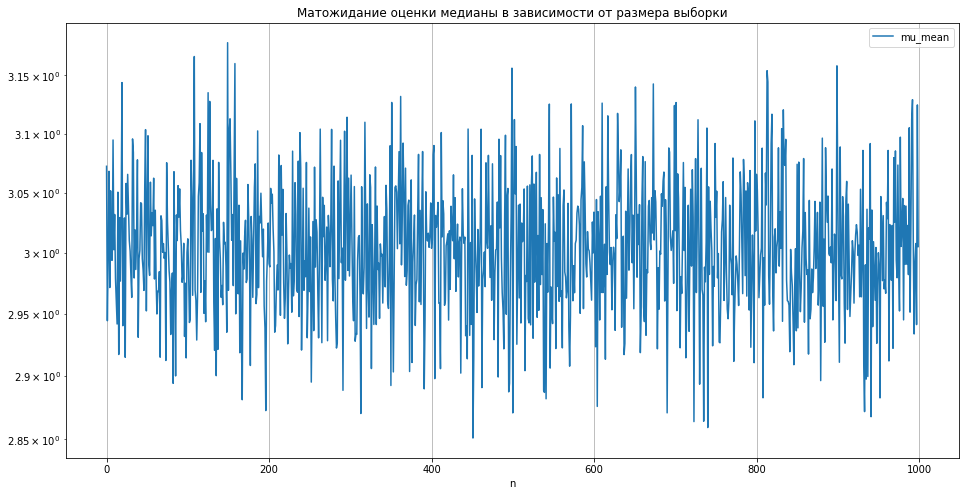

In [351]:
N=1000
M=1000
mu=3

sample = sts.norm(loc=mu).rvs((M, N))
est_median = np.array([np.median(sample[:,:i],axis = 1) for i in range(N)])
median_mean = np.mean(est_median[1:], axis=0)

plt.figure(figsize=(16, 8))
plt.title(f'Матожидание оценки медианы в зависимости от размера выборки')
plt.plot(median_mean, label='mu_mean')

plt.yscale('log')
plt.xlabel('n')
plt.grid()
plt.legend()

Как видно среднее значение медианы, т.е матожидание медианы примерно равно значению медианы. Значит оценка несмещенная

In [338]:
median_mean

array([-2.47480214e-02,  8.95834037e-02,  1.04138773e-01, -7.24927646e-02,
        7.00783031e-02,  3.83413310e-03,  6.52961221e-02,  1.67220366e-02,
       -4.92802367e-02, -2.78755189e-02,  3.23276930e-02, -4.89446843e-02,
       -1.41936546e-01, -4.22649831e-02, -1.61680750e-02,  1.23278523e-02,
       -5.89796856e-04, -6.88317706e-02,  6.56096268e-02, -5.19184549e-02,
        2.95484292e-02,  6.29815592e-02, -1.41411499e-02,  4.35009910e-02,
       -2.43667203e-03, -1.64548298e-02,  6.67007691e-02,  3.51819631e-03,
       -1.54498232e-02, -8.82075792e-02,  4.24075854e-02, -7.01390437e-02,
        4.59741896e-03, -5.64119437e-02, -1.70170626e-03, -5.37772874e-02,
       -4.54726897e-02,  1.13851175e-01, -3.54467120e-02,  4.46488329e-02,
       -6.01894484e-02, -1.08592644e-02,  7.37296722e-03, -4.53384236e-03,
       -2.49284279e-02,  1.07554136e-02,  4.34986822e-02,  8.50116669e-03,
        6.52555525e-02,  5.00385016e-02,  8.46528411e-02,  1.76597365e-02,
        3.70094615e-02,  

In [331]:
est_median

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 1.96203315,  0.72358104, -0.35956339, ...,  1.17048035,
         0.56056742,  0.8980933 ],
       [ 1.86440697,  0.13103126, -0.51446029, ...,  1.21945751,
         0.16476076,  0.92784318],
       ...,
       [-0.06907121, -0.15173741,  0.12704524, ..., -0.07450113,
         0.08442702,  0.0878578 ],
       [-0.07117856, -0.15162719,  0.11520994, ..., -0.04533962,
         0.08529582,  0.10619343],
       [-0.06907121, -0.15173741,  0.10337465, ..., -0.07450113,
         0.08442702,  0.0878578 ]])

In [329]:

est_median = est_median[np.logical_not(np.isnan(est_median))]
est_median.shape

(999000,)

## Эксперимент

В качестве экспериментальных данных нам предлагается сцена, на которой видны ступеньки. Модель сцены закодирована в
файле raw_scene.bin .


In [35]:
with open('/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/2.Math/HWs/HW_6/HW1 2/raw_scene.bin', 'rb') as f:
    x = np.load(f)
    y = np.load(f)
    z = np.load(f)

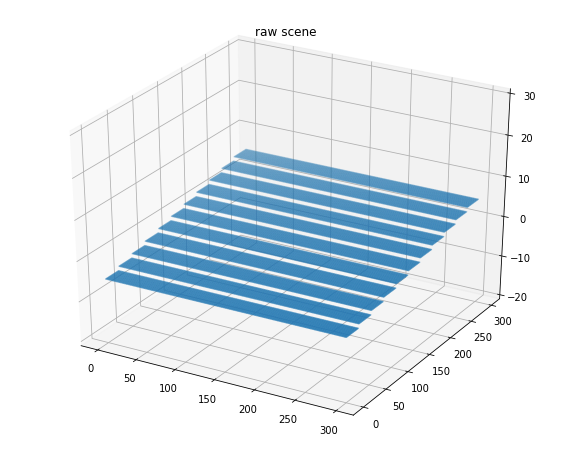

In [36]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(projection='3d')
ax1.set_zlim((-20, 30))
ax1.set_title("raw scene")
ax1.scatter(x, y, z, s=0.05)

В соседнем файле point_cloud.bin находятся смоделированные лидарные данные съёмки такой сцены.


In [38]:
with open('/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/2.Math/HWs/HW_6/HW1 2/point_cloud.bin', 'rb') as f:
    x_l = np.load(f)
    y_l = np.load(f)
    z_l = np.load(f)


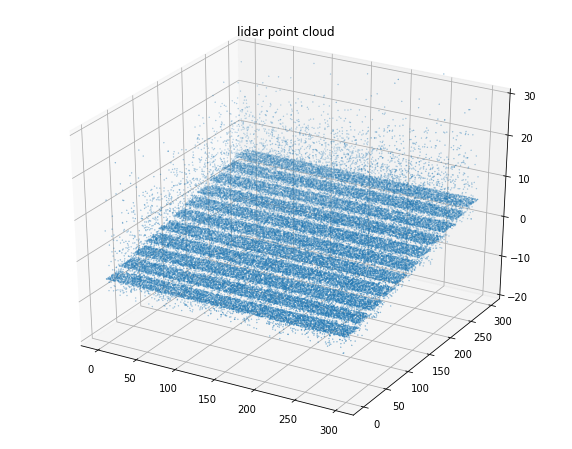

In [39]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(projection='3d')
ax1.set_zlim((-20, 30))
ax1.set_title("lidar point cloud")
ax1.scatter(x_l, y_l, z_l, s=0.1)

Данная функция разбивает плоскость Oxy на сетку 100х100 и в соответствующую ячейку помещает список z‑координат
попавших в неё точек.


In [40]:
def make_grid(x, y, z):
    M = 100
    grid = [[[] for i in range(M)] for i in range(M)]
    
    max_x = np.max(x)
    max_y = np.max(y)
    min_x = np.min(x)
    min_y = np.min(y)
    
    step_x = (max_x - min_x) / M 
    step_y = (max_y - min_y) / M 

    for i in range(len(x)):
        index_x = max(0, int((x[i] - min_x) / step_x) - 1)
        index_y = max(0, int((y[i] - min_y) / step_y) - 1)
        
        grid[index_x][index_y].append(z[i])
        
    return grid


In [41]:
grid = make_grid(x_l, y_l, z_l)

Осталось в каждой ячейке сетки применить оценку. В функции ниже реализуйте предложенную вами оценку высоты $\hat{h}(\textbf Z^n)$.

In [357]:
def estimator(x):
  sample = np.array(x)
  return np.median(sample)

In [358]:
def draw_heights_map(grid, estimator):
    M = 100
    image = np.zeros((100, 100))
    for i in range(M):
        for j in range(M):
            image[i,j] = estimator(grid[i][j])
            
    fig, ax = plt.subplots(1, figsize=(10,10))
    plt.title('Heights map')
    im = plt.imshow(image)
    ax.figure.colorbar(im, ax=ax)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


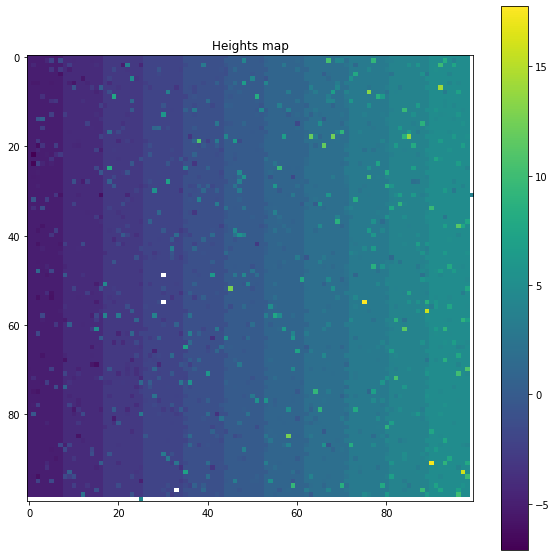

In [359]:
draw_heights_map(grid, estimator)

Как видно из последнего графика, высота ступенек растет слева направо. Предположение, что высота ступеньки будет сосредоточена в медиане среди точек пикселя оказалось верным.

# 2. Московское метро

В московском метро решили установить систему распознавания лиц. Но разработчики столкнулись с проблемой — они не знают, какая нужна вместимость сервера по памяти, чтобы хранить снимки одной камеры за целый день.
Они ограничили объём одного фото 1Мб. Пройдя ад бюрократии и собрав данные, они узнали, что через один фиксированный турникет в разные дни года проходило:

In [3]:
with open("/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/2.Math/HWs/HW_6/HW1 2/people.bin", "rb") as f:
    people = np.load(f)
    
print(people)

[10677 11493 11158 10505 11138 11575 10963 10948 11265 10845 10925 11081
 10778 10018 11827 10808 10655  9930 10190 11172 11090 11072 11238 10736
 11698 11498 11516 10572 11213 10950 11548 11640 10474 11215 11054 11498
 11433 10673 10360 11798 10892 10838 11656 10604 10244 10559 10715 10957
 10556 11010 10909 10173 10626 11867  9898 11261 10834 11500 10229 10885
 10260 10378 11306 10781 10717 10958 11497 11229 10965 10836 11053 11698
 11032 10389 11097 10951 11675 10983 11409 11279 11710 11700 11392 10945
 11401 11289 10877 11282 11008 10810 11147  9891 10844 10797 11183 11712
 10892 10786 11492 10169 11566 11002 11222 10729 11944 11904 11120  9884
 10126 10395 11148 10845 11869 11279 11248 10665 11907 11344 10622 11142
 11167 11602 10898 11199 10819 10813  9946 10469 11271 10250 11528 10947
 10690 11521 11224 10591 10607 10792 11319 11011 10948 11740 10959 10892
 10878 10562 11441 10800  9842 11463 11101 11053 11194 11158 11512 11092
 11584 11257 11387 10454 11574 11131 10957 11111 11

Ваш коллега увидел данные и сказал, что 12000Мбайт хватит. Вы хотите уберечь его от ошибки и доказать ему, что он неправ.
 1. Графически проиллюстрируйте распределение выборки. Выдвиньте гипотезу — из какого семейства распределений пришли данные? Ничего страшного, если по графику не будет однозначно понятно распределение - обычно так и бывает.
 2. В полученной модели оцените параметры распределения. Используя полученные оценки оцените вероятность того, что в случайный день памяти, предложенной коллегой,  не хватит.
 3. Постройте интервал доверия для параметров распределения с высоким уровнем (например 0.99). В «худшем» случае значений параметров перебором найдите такое значение памяти, что вероятность перегрузки сервера не будет превышать 0.1%.
 4. Хороший ли это способ подбора значения памяти? Может быть вы можете предложить свой метод?

### Пункт 1

In [59]:
 n = len(people)
 n

365

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  6.,  3.,  1.,  1.,
         2.,  4.,  4.,  6.,  3.,  5.,  6.,  4.,  6., 11., 11., 13., 13.,
        10., 19., 16., 16., 18., 15., 19., 14., 15., 14., 20.,  7., 12.,
         5., 15.,  8.,  7.,  7., 10.,  3.,  3.,  5.,  4.,  2.]),
 array([ 9382.,  9434.,  9486.,  9538.,  9590.,  9642.,  9694.,  9746.,
         9798.,  9850.,  9902.,  9954., 10006., 10058., 10110., 10162.,
        10214., 10266., 10318., 10370., 10422., 10474., 10526., 10578.,
        10630., 10682., 10734., 10786., 10838., 10890., 10942., 10994.,
        11046., 11098., 11150., 11202., 11254., 11306., 11358., 11410.,
        11462., 11514., 11566., 11618., 11670., 11722., 11774., 11826.,
        11878., 11930., 11982.]),
 <a list of 50 Patch objects>)

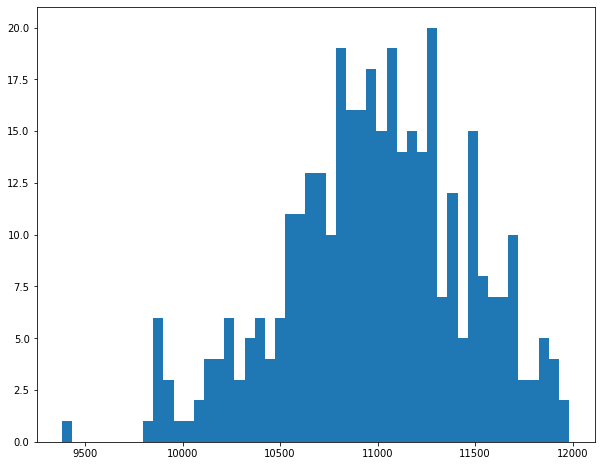

In [60]:
plt.figure(figsize=(10,8))
plt.hist(people, bins = 50)

Похоже на Нормальное распределение

### Пункт 2

Оценим параметры распределения для $X \sim N(\mu, \sigma^2)  $ Нормального распределения, матожидание $\mu$ и  дисперсию $\sigma^2$

Оценки получим методом моментов:

$\hat{\mu_{mm}} = \overline{X} $

$\hat{\sigma_{mm}^2} = \overline{X^2} - \overline{X}^2 $

, где $\overline{X} = \frac{1}{n}\displaystyle\sum_{i=1}^{n} X_i $

In [138]:
mean_mm = np.mean(people)
mean_mm

10988.2

In [11]:
# sigma_mm = np.sqrt(np.mean(people**2) - np.mean(people)**2)
# sigma_mm

466.59925723183835

In [139]:
n = len(people)
sigma_mm = (n / (n - 1)) * np.mean((people - mean_mm)**2) # сигма квадрат
sigma_mm

218312.98461538463

In [140]:
np.sqrt(sigma_mm)

467.23975067986737

#### Найдем вероятность того что памяти не хватит 1м способом:

Подставим значения оценок в формулу нахождения функции распределения для нормального распределения:
$ F(x) = P(a<X<b) = Ф(\frac{b-\mu}{\sigma}) - Ф(\frac{a-\mu}{\sigma}) $, где $ Ф $ - фунция Лапласа

$ P(0<X<12000) = Ф(\frac{b-\hat{\mu}}{\sigma}) - Ф(\frac{a-\hat{\mu}}{\sigma}) = Ф(\frac{12000-10988.2}{466.59925723183835}) - Ф(\frac{0-10988.2}{466.59925723183835}) = Ф(2.1684560879985884) - Ф(-23.549544560334166) = Ф(2.1684560879985884) + Ф(23.549544560334166) = 0.4850 + 0.5 = 0.985 $ - Вероятность того что случайная величина попадет в интервал от 0 до 12000, т.е памяти хватит.

Тогда, вероятность того что памяти Не хватит: 1 - 0.985 = 0.015

#### Найдем вероятность того что не хватит 2м способом

In [131]:
z_12 = 12000 # выборочный квантиль у нас будет = 12000

In [132]:
p_over = 1 - sts.norm(mean_mm, np.sqrt(sigma_mm)).cdf(z_12) # вероятность того что памят превысит 12000 мб в случайный день
p_over

0.015175336418086327

### Пункт 3

In [133]:
p = 0.99 # уровень квантиля

In [134]:
alpha = 1 - p
alpha_na_2 = alpha / 2
odin_minus_alpha_na_2 = 1 - alpha_na_2

In [135]:
# z0995 = np.quantile(people, odin_minus_alpha_na_2) # выборочный квантиль
# z0005 = np.quantile(people, alpha_na_2)

#### Матожидание

##### Доверительный интервал для матожидания

найдем дов инт с предположением что дисперсия известна, тогда

In [141]:
z0995 = sts.norm.ppf(odin_minus_alpha_na_2)
z0005 = sts.norm.ppf(alpha_na_2)
print(f'z0995 = {z0995}, z0005 = {z0005}')

z0995 = 2.5758293035489004, z0005 = -2.5758293035489004


In [143]:
lower0995_mu = mean_mm - np.sqrt(sigma_mm) * z0995  / np.sqrt(len(people))
upper0005_mu = mean_mm - np.sqrt(sigma_mm) * z0005 / np.sqrt(len(people))

print(f'lower0995_mu = {lower0995_mu}, upper0005_mu = {upper0005_mu}')

lower0995_mu = 10925.204368936369, upper0005_mu = 11051.195631063632


##### Вероятность перегрузки сервера. Подставляю граничные значения матожидания
$ 1 - F_{N(\hat{\mu},\hat{\sigma})}(Z = 12000) < 0.1\% $


In [169]:
def perebor(mu,sigma,eps,prob = 0.001):
  """функция которая перебирает значения случайной величины памяти. При определенном значении памяти вероятность перегрузки сервера станет меньше 0,1%"""
  
  for memory_value in range(0, 24000,eps):
    if 1 - sts.norm(mu,np.sqrt(sigma)).cdf(memory_value) < prob:
      return mu, sigma, memory_value

In [170]:
mu, sigma, memory_value = perebor(lower0995_mu, sigma_mm, 10)

print(f'mu = {mu}, sigma = {sigma}, memory_value = {memory_value}')

mu = 10925.204368936369, sigma = 218312.98461538463, memory_value = 12370


In [171]:
mu, sigma, memory_value = perebor(upper0005_mu, sigma_mm, 10)

print(f'mu = {mu}, sigma = {sigma}, memory_value = {memory_value}')

mu = 11051.195631063632, sigma = 218312.98461538463, memory_value = 12500


#### Дисперсия


##### Доверительный интервал для дисперсии

найдем дов инт для дисперсии в предположении что матож известно

In [184]:
z0995_chi = sts.chi2.ppf(odin_minus_alpha_na_2, df =(n))
z0005_chi = sts.chi2.ppf(alpha_na_2, df =(n))
print(f'z0995_chi = {z0995_chi}, z0005_chi = {z0005_chi}')

z0995_chi = 438.3456928574332, z0005_chi = 299.1630982940267


In [180]:
lower0995_disp = np.sum(people**2) / (z0995_chi + mean_mm)
upper0005_disp = np.sum(people**2) / (z0005_chi + mean_mm)

print(f'lower0995_disp = {lower0995_disp}, upper0005_disp = {upper0005_disp}')

lower0995_disp = 3863789.1044007614, upper0005_disp = 3911432.8443702497


##### Вероятность перегрузки сервера. Подставляю граничные значения дисперсии 
$ 1 - F_{N(\hat{\mu},\hat{\sigma})}(Z = 12000) < 0.1\% $

In [182]:
mu, sigma, memory_value = perebor(mean_mm, lower0995_disp, 10)

print(f'mu = {mu}, sigma = {sigma}, memory_value = {memory_value}')

mu = 10988.2, sigma = 3863789.1044007614, memory_value = 17070


In [183]:
mu, sigma, memory_value = perebor(mean_mm, upper0005_disp, 10)

print(f'mu = {mu}, sigma = {sigma}, memory_value = {memory_value}')

mu = 10988.2, sigma = 3911432.8443702497, memory_value = 17100


### Этим способом перебора мы увидели что на крайних значениях матожидания и дисперсии можно определить краевые значения памяти. Так же видно, что с определенной вероятностью сервер может перегрузиться и памяти потребуется больше чем 12000 Мбайт

### 3. Генерация уровня

В геймдев-компании решили разработать игру "построй дорогу". Игрок выступает городским инженером и прокладывает сети дорог, создавая инфраструктуру. Тестировщики заметили, что в одной из версий, возможно, присутствует баг.

Город представляет собой квадрат размером $1$ на $1$. Вдоль оси $Ox$ через город протекает прямая река шириной $0.1$. Центр реки должен был генерироваться равномерно по оси $Oy$, но отдел тестирования нашёл версию, в которой, как им кажется, реки смещены вниз.

Как настоящий аналитик вы не поверили их глазомеру и решили построить критерий проверки гипотезы в модели равномерного распределения $U[0, \theta]$. Нулевая гипотеза состоит в том, что $H_0: \theta = 1$ против альтернативы $H_1: \theta < 1$.

0. Изобразите выборки графически и подумайте, правдоподобен ли выбор таких гипотез.
1. Используя доверительный интервал для параметра $\theta$ постройте критерий для проверки такой гипотезы. 
2. Проверьте, отвергается ли нулевая гипотеза на уровне значимости 0.05, используя собранные тестировщиками выборки из двух разных версий игры. Найдите p-value перебором.
3. Какова вероятность, что гипотеза не отвергнута, а тестировщики правы?
4. Какова вероятность, что гипотеза отвергнута, но тестировщики были не правы? 
5. Что из этого ошибка второго рода, а что первого?
6. Проверьте экспериментально, что значения, полученные в пунктах 3-4, правильные. Для этого сгенерируйте M=100 выборок из нулевой гипотезы и M выборок из первой гипотезы (проделайте это для разных $\theta$). Найдите долю ошибок вашего критерия в обоих случаях.

In [ ]:
# данные из двух разных версий
with open("/content/drive/MyDrive/Colab Notebooks/MIPT ФПМИ DS/2.Math/HWs/HW_6/HW1 2/game.bin", "rb") as f:
    sample_1 = np.load(f)
    sample_2 = np.load(f)
    
print(sample_1)
print(sample_2)

(array([4., 6., 3., 2., 2., 3., 4., 1., 4., 1., 2., 1., 8., 4., 3., 0., 4.,
        3., 6., 3., 3., 3., 2., 4., 1., 4., 6., 5., 5., 3.]),
 array([0.00524315, 0.0350562 , 0.06486925, 0.09468229, 0.12449534,
        0.15430839, 0.18412143, 0.21393448, 0.24374753, 0.27356057,
        0.30337362, 0.33318667, 0.36299972, 0.39281276, 0.42262581,
        0.45243886, 0.4822519 , 0.51206495, 0.541878  , 0.57169104,
        0.60150409, 0.63131714, 0.66113019, 0.69094323, 0.72075628,
        0.75056933, 0.78038237, 0.81019542, 0.84000847, 0.86982151,
        0.89963456]),
 <a list of 30 Patch objects>)

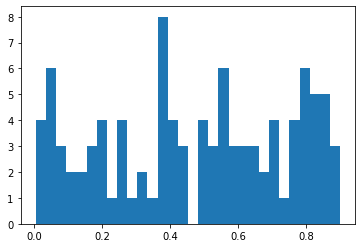

In [195]:
plt.hist(sample_1,bins=30)

(array([4., 7., 3., 3., 3., 0., 5., 3., 1., 2., 3., 2., 5., 1., 6., 3., 4.,
        5., 5., 3., 2., 2., 7., 4., 2., 4., 4., 2., 1., 4.]),
 array([0.00197144, 0.03498596, 0.06800048, 0.10101501, 0.13402953,
        0.16704405, 0.20005857, 0.23307309, 0.26608761, 0.29910213,
        0.33211665, 0.36513117, 0.39814569, 0.43116022, 0.46417474,
        0.49718926, 0.53020378, 0.5632183 , 0.59623282, 0.62924734,
        0.66226186, 0.69527638, 0.7282909 , 0.76130543, 0.79431995,
        0.82733447, 0.86034899, 0.89336351, 0.92637803, 0.95939255,
        0.99240707]),
 <a list of 30 Patch objects>)

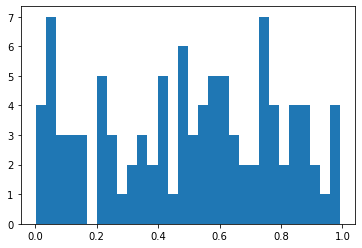

In [196]:
plt.hist(sample_2,bins=30)